In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as la

In [150]:
#for x
n= 200
for i in range(0,n):
    n = i
    file_path  = r'X:\GIt\CloudCastSmall\TrainCloud\{}.npy'.format(n)
    temp1 = np.load(file_path)
    temp2 = temp1.reshape(-1,1)
    if n==0:
        x = temp2
    else:
        x = np.hstack((x,temp2))
x.shape

(16384, 200)

In [153]:
#for x'
n=200
for i in range(1,n+1):
    n = i
    file_path  = r'X:\GIt\CloudCastSmall\TrainCloud\{}.npy'.format(n)
    temp1 = np.load(file_path)
    temp2 = temp1.reshape(-1,1)
    if n==1:
        x_p = temp2
    else:
        x_p = np.hstack((x_p,temp2))
x_p.shape

(16384, 200)

In [134]:
#load timestamp file as dataframe
file_path = r'X:\GIt\DA_p\data\TIMESTAMPS.npy'
timestamp= np.load(file_path)
timestamp = pd.DataFrame(timestamp)

Text(0.5, 1.0, 'Singular Values')

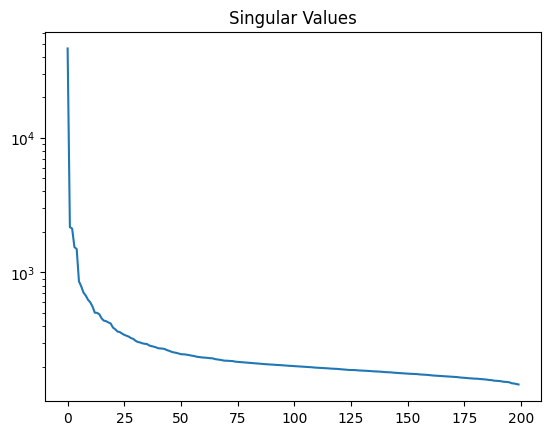

In [154]:
#get singular value decompositon of x
u,s,v = la.svd(x,full_matrices=False)
#plot singular values on semilog scale
plt.semilogy(s)
plt.title('Singular Values')

In [155]:
#Truncate u, s , v at 25 modes
k=25
u_k = u[:,:k]
s_k = s[:k]
v_k = v[:k,:]
print(u_k.shape)
print(s_k.shape)
print(v_k.shape)

(16384, 25)
(25,)
(25, 200)


In [156]:
#Forming A_tilde
A_tilde = u_k.T@x_p@v_k.T@la.inv(np.diag(s_k))
A_tilde.shape

(25, 25)

In [157]:
#Get Eigenvectors and Eigenvalues of A_tilde
e_val,w = la.eig(A_tilde)

In [158]:
Phi = x_p@v_k.T@la.inv(np.diag(s_k))@w
Phi.shape

(16384, 25)

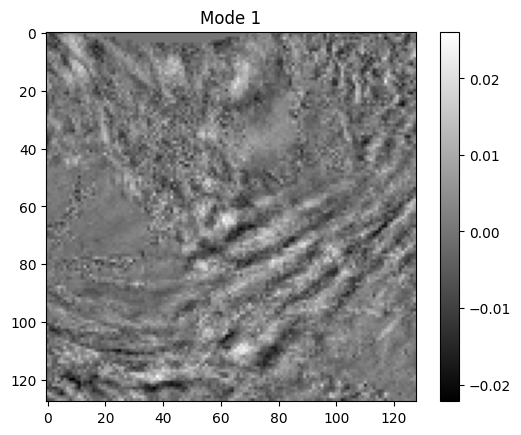

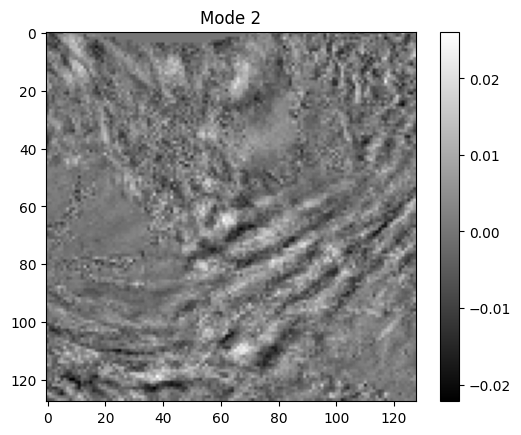

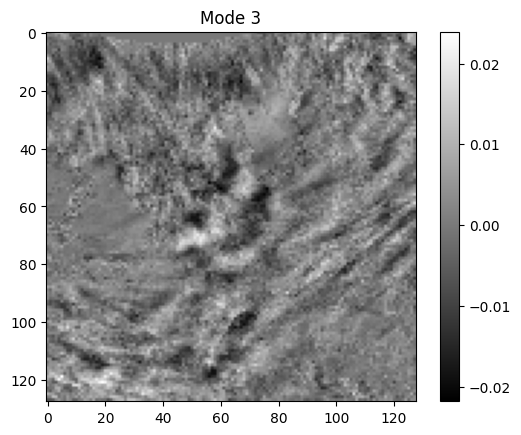

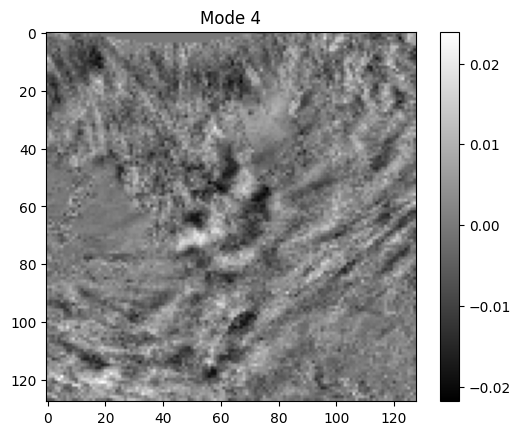

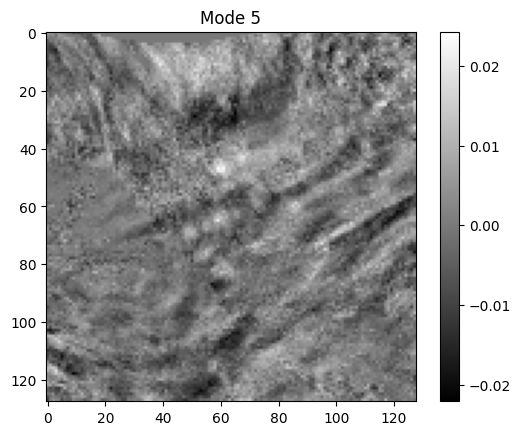

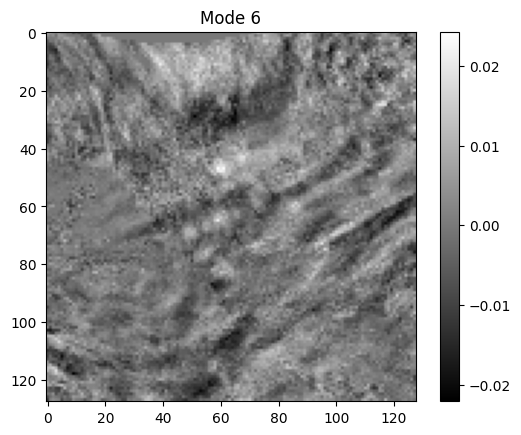

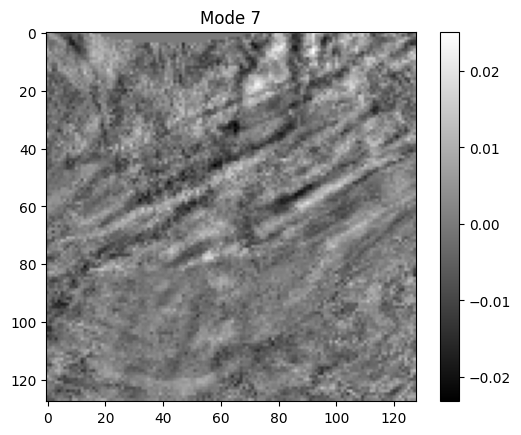

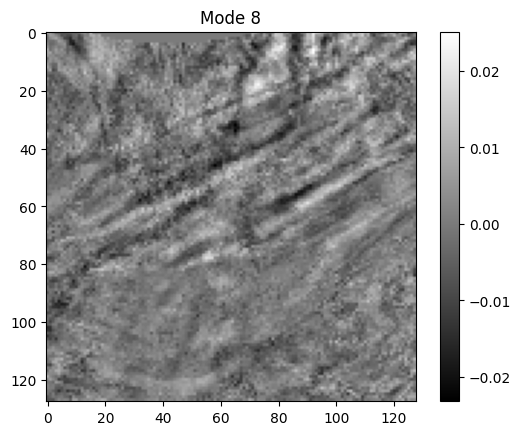

In [161]:
#plotting all modes of Phi
for i in range(0,8):
    V = np.copy(np.real(np.reshape(Phi[:,i],(128,128))))
    plt.title('Mode {}'.format(i+1))
    plt.imshow(V,cmap='gray')
    plt.colorbar()
    plt.show()
